# Guide for Principal Component Analysis

## 1 - Import Libraries for Analysis and Explore Data

## 2 - Input Missing Data / Replace Strings

## 3 - Correlations

## 4 - PCA Alghorithm

**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\dsilsant\Downloads\DS_dataset\pokemon.csv')
print('Data imported with {} columns and {} rows'.format(data.shape[1],data.shape[0]))

Data imported with 12 columns and 800 rows


In [32]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


**Checking missing data**

In [2]:
print('Variables with missing data are: \n')
for i in data:
    if data[i].isnull().sum() > 0:
        print('Variable: ',i)
        print('Sum: ',data[i].isnull().sum())
        print('%: ',data[i].isnull().sum()/len(data),'\n')

Variables with missing data are: 

Variable:  Name
Sum:  1
%:  0.00125 

Variable:  Type 2
Sum:  386
%:  0.4825 



In [4]:
data.drop(['#','Name','Type 2'],axis=1,inplace=True)

In [99]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [5]:
# FOR REPLACING STRINGS
def replacing(x,df):
    replace_var=[]
    unique=df[x].unique()
    for i in range (len(df[x].unique())):
        replace_var.append(i)
    df[x].replace(unique,replace_var,inplace=True)

replacing('Type 1',data)
replacing('Legendary',data)

**Correlations between variables**

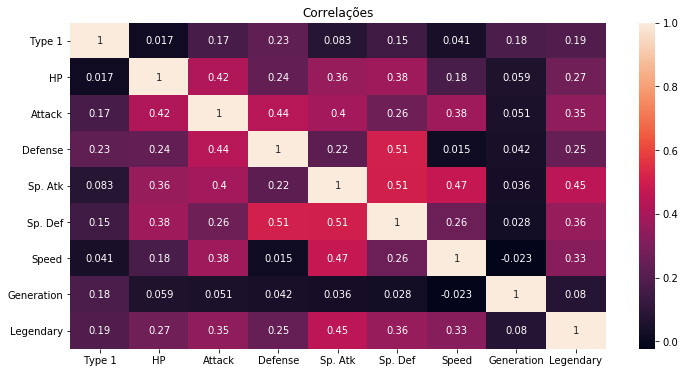

In [6]:
fig=plt.figure(figsize=(12,6),)
sns.heatmap(data.corr(),annot=True,)
plt.title('Correlações')
plt.show()

In [7]:
X = data.iloc[:,:8].values
y = data.loc[:,'Legendary']

**Standardize the data**

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

C:\Users\dsilsant\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Matrix
- ** Covariance Matrix ** or ** Correlation Matrix**

**Covariance Matrix**

In [9]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.1649781   0.58334367 -0.01519123 -0.25453789 -0.55793696 -0.50051709
  -0.07489322 -0.00721623]
 [ 0.37733485 -0.09034922 -0.2361989   0.11870111  0.54656178 -0.5993941
  -0.27311325 -0.21675249]
 [ 0.43629217 -0.00618876  0.50530849 -0.04651828 -0.02882896  0.27347571
  -0.6629401   0.19235532]
 [ 0.37027448  0.38574257 -0.53299551  0.47528818 -0.07966307  0.44024256
  -0.03043018 -0.05505168]
 [ 0.4452997  -0.25946847 -0.20402147 -0.18810432 -0.02933732 -0.08158653
   0.33371268  0.73382226]
 [ 0.44330779  0.05670659  0.54560798  0.26014232  0.01541128 -0.03712768
   0.58568067 -0.30043744]
 [ 0.32270281 -0.44200355 -0.25542985 -0.46990623 -0.30896051  0.19108143
  -0.00715605 -0.53143162]
 [ 0.06321282  0.48662602 -0.00108911 -0.6076089   0.5350182   0.27759671
   0.1579474  -0.041925  ]]

Eigenvalues 
[ 2.76732274  1.24512237  0.26726649  1.01746172  0.87570231  0.63582644
  0.7733557   0.42795475]


** Correlation Matrix**

In [10]:
cor_mat = np.corrcoef(X_std.T) # standardized dada but also possible with raw Data (X)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.1649781   0.58334367 -0.01519123 -0.25453789 -0.55793696 -0.50051709
  -0.07489322 -0.00721623]
 [ 0.37733485 -0.09034922 -0.2361989   0.11870111  0.54656178 -0.5993941
  -0.27311325 -0.21675249]
 [ 0.43629217 -0.00618876  0.50530849 -0.04651828 -0.02882896  0.27347571
  -0.6629401   0.19235532]
 [ 0.37027448  0.38574257 -0.53299551  0.47528818 -0.07966307  0.44024256
  -0.03043018 -0.05505168]
 [ 0.4452997  -0.25946847 -0.20402147 -0.18810432 -0.02933732 -0.08158653
   0.33371268  0.73382226]
 [ 0.44330779  0.05670659  0.54560798  0.26014232  0.01541128 -0.03712768
   0.58568067 -0.30043744]
 [ 0.32270281 -0.44200355 -0.25542985 -0.46990623 -0.30896051  0.19108143
  -0.00715605 -0.53143162]
 [ 0.06321282  0.48662602 -0.00108911 -0.6076089   0.5350182   0.27759671
   0.1579474  -0.041925  ]]

Eigenvalues 
[ 2.76386358  1.24356596  0.2669324   1.0161899   0.87460769  0.63503166
  0.77238901  0.4274198 ]


**Correlations with Components**

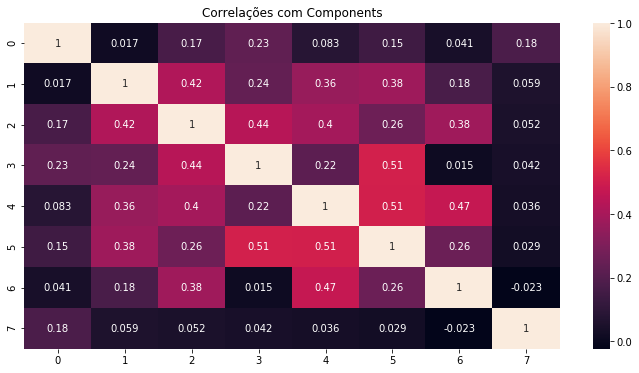

In [11]:
fig=plt.figure(figsize=(12,6),)
sns.heatmap(cov_mat,annot=True)
plt.title('Correlações com Components')
plt.show()

** One way to choose the best number of components**

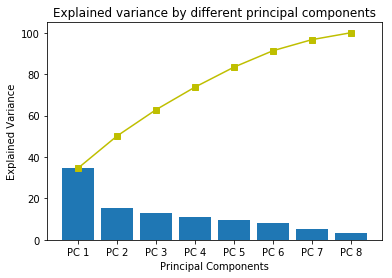

In [12]:
tot = sum(eig_vals) # sum of eg_vals
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # to order the eig_values
cum_var_exp = np.cumsum(var_exp) # to get a cumulative sum of eig_values

# fig, ax = plt.subplots()

plt.bar(['PC %s' %i for i in range(1,9)], var_exp)
plt.plot(['PC %s' %i for i in range(1,9)], cum_var_exp,marker='s',color='y')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained variance by different principal components')

plt.show()

**Other way to choose the best number of components**

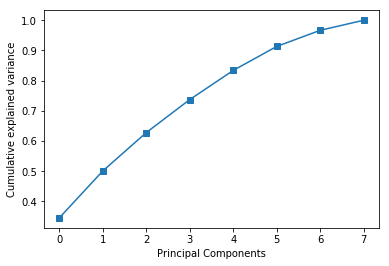

In [13]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='s')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

** Running PCA with the correct number of components**

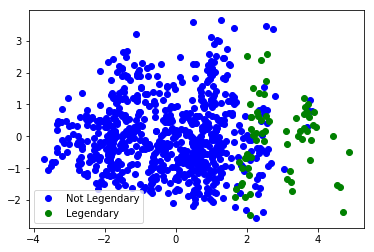

In [14]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=5)
x_components = sklearn_pca.fit_transform(X_std)


plt.plot(x_components[y == 0, 0], x_components[y == 0, 1], 'bo', label='Not Legendary')
plt.plot(x_components[y == 1, 0], x_components[y == 1, 1], 'go', label='Legendary')
plt.legend(loc=0)
plt.show()
#x_components[y == 1 (real value of y), 0 (position of X_component)]

### Loading Matrix
#### Factor Correlations

In [51]:
#Definition of the columns name for components
columns=[]
for i in range(x_components.shape[1]):
    columns.append('PC{}'.format(i+1))

#Creation of the new dataframe with components
df2 = pd.concat([pd.DataFrame([x_components[i]], columns=columns) for i in range(x_components.shape[0])],
          ignore_index=True)
df2.head()

#Definition of the row name for variables
# mat=[]
# for i in range(cov_mat.shape[1]):
#     mat.append('{}'.format(i+1))

mat=['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Generation']

#Creation of the new dataframe with standardized variables
df3 = pd.concat([pd.DataFrame([X_std[i]], columns=mat) for i in range(X_std.shape[0])],
          ignore_index=True)
df3.head()

# Concat both dataframes
df_corr = pd.concat([df2, df3], axis=1)

# Factor Correlations with initial variables
df_corr_matrix= df_corr.corr()
df_corr_matrix.iloc[5:,0:5]

,PC1,PC2,PC3,PC4,PC5
Type 1,0.274274,0.650517,-0.256590,-0.521785,-0.065820
HP,0.627314,-0.100753,0.119658,0.511147,-0.240027
Attack,0.725330,-0.006901,-0.046893,-0.026961,-0.582629
Defense,0.615577,0.430162,0.479120,-0.074501,-0.026744
Sp. Atk,0.740305,-0.289347,-0.189621,-0.027436,0.293286
Sp. Def,0.736994,0.063237,0.262240,0.014413,0.514729
Speed,0.536489,-0.492902,-0.473695,-0.288941,-0.006289
Generation,0.105090,0.542662,-0.612508,0.500351,0.138813


** Creation of New DataSet with the Components and Target Variables**

In [130]:
#Definition of the columns name
columns=[]
for i in range(x_components.shape[1]):
    columns.append('PC{}'.format(i+1))

#Creation of the new dataframe
df = pd.concat([pd.DataFrame([x_components[i]], columns=columns) for i in range(x_components.shape[0])],
          ignore_index=True)
df = pd.concat([df, data.Legendary], axis=1)
df.head()

,PC1,PC2,PC3,PC4,PC5,Legendary
0,-1.834492,-1.249520,1.088129,-0.205513,0.553453,0
1,-0.661475,-1.448539,1.164099,-0.096302,0.578813,0
2,0.954258,-1.697903,1.281903,0.043534,0.556825,0
3,2.289993,-1.340001,1.926666,-0.083368,0.795570,0
4,-2.005251,-1.478728,0.477038,-0.652416,0.175012,0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_components,y,random_state=0, test_size=0.3)
# We can use the X_values or real data.loc with variable name included

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model =LogisticRegression()
model.fit(x_train,y_train)
pred1=model.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,pred1))

Accuracy.:  0.95


In [35]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_leaf_nodes=5)
dt.fit(x_train, y_train)
prediction5=dt.predict(x_test)
print('Accuracy.: ',metrics.accuracy_score(y_test,prediction5))

Accuracy.:  0.945833333333


#### Rules of Thumb for PCA
- It should work better with a dataset with more than 20 variables.
- For Eigenvalue selection, typically we should chose the ones above 1
- To produce the Loading Matrix (pca.components_.T * np.sqrt(pca.explained_variance_))
    - sklearn_pca.components_.T * sklearn_pca.explained_variance_